In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# 훈련용 데이터 불러오기 
train = pd.read_csv("https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/train.csv")
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
train.isnull().sum() ## Cabin은 결측치가 너무 크다 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
import math

In [42]:
pd.crosstab(train['Sex'], train['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [43]:
def show_pie_chart(df, col_name):
    colname_survived = survived_crosstab(train, col_name)
    pie_chart(colname_survived)
    return colname_survived

def survived_crosstab(df, col_name):
    '''col_name과 Survived간의 교차도표 생성'''
    feature_survived = pd.crosstab(df[col_name], df['Survived'])
    feature_survived.columns = feature_survived.columns.map({0:"Dead", 1:"Alive"})
    return feature_survived

def pie_chart(feature_survived):
    '''
    pie_chart 생성
    pcol, prow = 차트를 출력할 개수. pcol * prow 만큼의 차트 출력 
    '''
    frows, fcols = feature_survived.shape
    pcol = 3
    prow = math.ceil((frows/pcol + frows%pcol))
    print(prow, pcol)
    plot_height = prow * 2.5
    plt.figure(figsize=(8, plot_height))

    for row in range(0, frows):
        plt.subplot(prow, pcol, row+1)

        index_name = feature_survived.index[row]
        plt.pie(feature_survived.loc[index_name], labels=feature_survived.loc[index_name].index, autopct='%1.1f%%')
        plt.title("{0}' survived".format(index_name))

    plt.show()

3 3


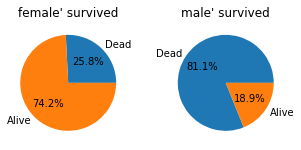

Survived,Dead,Alive
Sex,,
female,81,233
male,468,109


In [44]:
c = show_pie_chart(train, 'Sex')
c

=> 여성의 생존률이 더 높음을 알 수 있음 

1 3


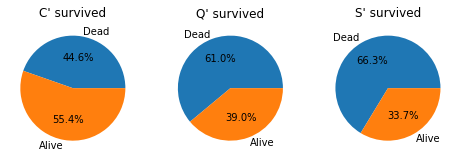

Survived,Dead,Alive
Embarked,,
C,75,93
Q,47,30
S,427,217


In [45]:
c = show_pie_chart(train, 'Embarked')
c

=> C>Q>S 순으로 생존률이 높음을 알 수 있다 

In [46]:
train.Name.str.extract(' ([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [47]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.')
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [48]:
train['Title'] = train['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', \
                                         'Jonkheer', 'Lady','Major', 'Rev', 'Sir'], 'Other')

In [49]:
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train['Title'] = train['Title'].replace('Ms', 'Miss')   
train['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title, dtype: int64

4 3


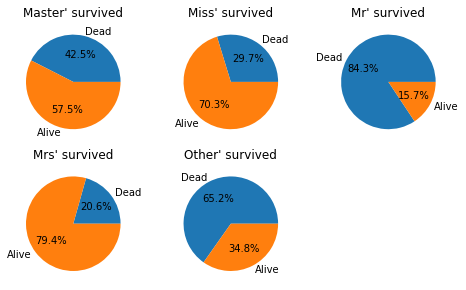

Survived,Dead,Alive
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Other,15,8


In [50]:
c = show_pie_chart(train, 'Title')
c

=> Mr 의 사망률이 높음을 알 수 있다 

나이에 존재하는 결측치를 호칭과 나이로 구한 나이의 평균값
qcut을 이용하여 8개의 구간으로 분리하여 나이 카테고리(AgeCategory)로 만들어 줍니다.

In [53]:
meanAge = train[['Title','Age']].groupby(['Title']).mean()

In [57]:
for index, row in meanAge.iterrows():
    nullIndex = train[(train.Title==index)&(train.Age.isna())].index
    train.loc[nullIndex,'Age']=row[0]

In [58]:
train.Age.isna().sum()

0

5 3


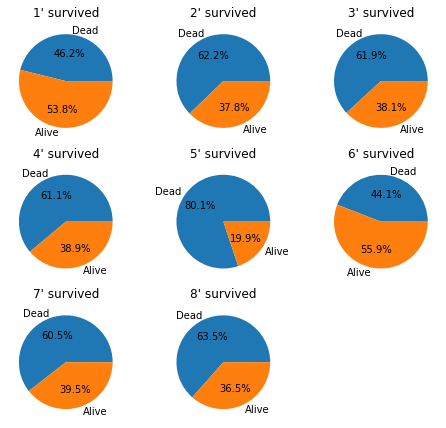

Survived,Dead,Alive
AgeCategory,,
1,54,63
2,79,48
3,60,37
4,66,42
5,125,31
6,30,38
7,69,45
8,66,38


In [59]:
train['AgeCategory'] = pd.qcut(train.Age,8,labels=range(1,9))
train.AgeCategory = train.AgeCategory.astype(int)

c = show_pie_chart(train, 'AgeCategory')
c

=> 나이가 어릴수록 생존률이 높아진다 

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,6
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,6


In [62]:
train.Cabin.isna().sum()

687

In [64]:
train.Cabin.fillna('N', inplace = True)

In [65]:
train['CabinCategory'] = train['Cabin'].str.slice(start=0, stop = 1)

In [67]:
train["CabinCategory"] = train['CabinCategory'].map({ "N": 0, "C": 1, "B": 2, "D": 3, "E": 4, "A": 5, "F": 6, "G": 7, "T": 8 })

In [74]:
train['CabinCategory'].value_counts() 

0    687
1     59
2     47
3     33
4     32
5     15
6     13
7      4
8      1
Name: CabinCategory, dtype: int64

3 3


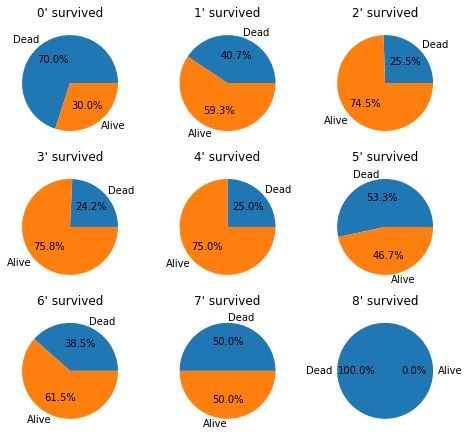

Survived,Dead,Alive
CabinCategory,,
0,481,206
1,24,35
2,12,35
3,8,25
4,8,24
5,8,7
6,5,8
7,2,2
8,1,0


In [75]:
c = show_pie_chart(train, 'CabinCategory')
c

=> 방번호 낮아질수록 사망률이 높아진다

In [79]:
train.Fare.isnull().sum()

0

5 3


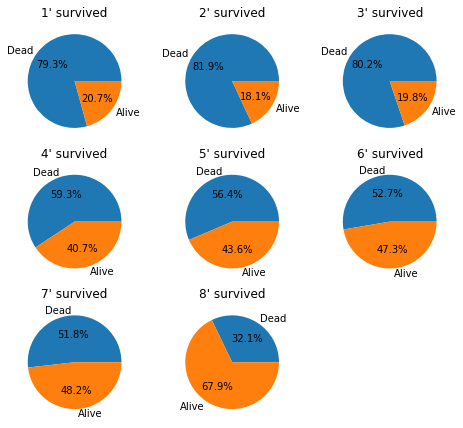

Survived,Dead,Alive
FareCategory,,
1,111,29
2,68,15
3,89,22
4,67,46
5,62,48
6,59,53
7,57,53
8,36,76


In [80]:
train['FareCategory'] = pd.qcut(train.Fare, 8, labels = range(1,9))
train['FareCategory'] = train['FareCategory'].astype(int)

c = show_pie_chart(train, 'FareCategory')
c

=> 요금이 비싸질수록 생존률이 높아진다 

In [81]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCategory,CabinCategory,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Mr,3,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,7,1,8
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Miss,4,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,6,1,7
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Mr,6,0,3


### SibSp : 형제자매, Parch : 자식

In [109]:
train['Family'] = train['SibSp'] + train['Parch'] + 1 ## 
train.loc[train["Family"] > 4, "Family"] = 5

In [83]:
train['IsAlone'] = 1
train.loc[train['Family']>1,'IsAlone'] = 0

In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCategory,CabinCategory,FareCategory,Family,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Mr,3,0,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,7,1,8,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Miss,4,0,3,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,6,1,7,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Mr,6,0,3,1,1


3 3


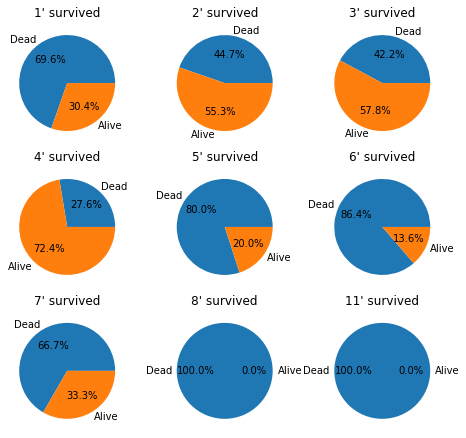

Survived,Dead,Alive
Family,,
1,374,163
2,72,89
3,43,59
4,8,21
5,12,3
6,19,3
7,8,4
8,6,0
11,7,0


In [85]:
c = show_pie_chart(train, 'Family')
c

3 3


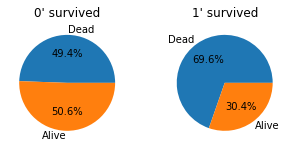

Survived,Dead,Alive
IsAlone,,
0,175,179
1,374,163


In [86]:
c = show_pie_chart(train, 'IsAlone')
c

=> 4인 가족의 경우가 생존률이 가장 높다.

In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCategory,CabinCategory,FareCategory,Family,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Mr,3,0,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,7,1,8,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Miss,4,0,3,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,6,1,7,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Mr,6,0,3,1,1


In [92]:
train['TicketCategory'] = train.Ticket.str.split()

In [94]:
train['TicketCategory'] = [i[-1][0] for i in train['TicketCategory']]

In [101]:
train['TicketCategory'].value_counts()

3    367
1    231
2    230
7     15
4     15
6     14
8     10
5      9
Name: TicketCategory, dtype: int64

In [100]:
train['TicketCategory'] = train['TicketCategory'].replace(['8','9','L'], '8')

In [102]:
train['TicketCategory'] = pd.factorize(train['TicketCategory'])[0] + 1

In [104]:
train['TicketCategory'].value_counts()

3    367
2    231
1    230
5     15
8     15
6     14
4     10
7      9
Name: TicketCategory, dtype: int64

5 3


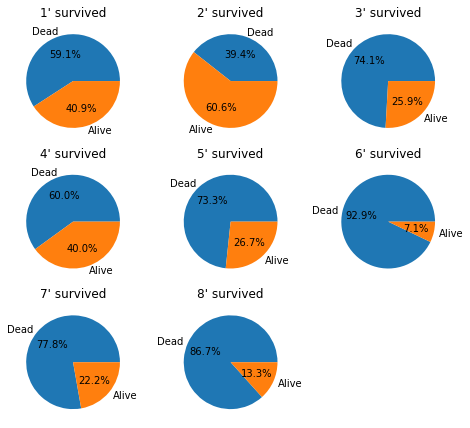

Survived,Dead,Alive
TicketCategory,,
1,136,94
2,91,140
3,272,95
4,6,4
5,11,4
6,13,1
7,7,2
8,13,2


In [106]:
c = show_pie_chart(train, 'TicketCategory')
c

In [110]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCategory,CabinCategory,FareCategory,Family,IsAlone,TicketCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,Mr,3,0,1,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,7,1,8,2,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,Miss,4,0,3,1,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,6,1,7,2,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,Mr,6,0,3,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,Other,4,0,4,1,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss,2,2,6,1,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.845638,1,2,W./C. 6607,23.4500,N,S,Miss,2,0,5,4,0,6
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Mr,4,1,6,1,1,2
